In [12]:
import pandas as pd 
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB


In [13]:
import texthero as hero

In [14]:
data=pd.read_csv("fake_or_real_news.csv")

In [15]:
data.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [16]:
data['clean title']=hero.clean(data['title'])

In [17]:
data.head()

,Unnamed: 0,title,text,label,clean title
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,smell hillary' fear
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,watch exact moment paul ryan committed politic...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,kerry go paris gesture sympathy
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,bernie supporters twitter erupt anger dnc trie...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,battle new york primary matters


In [18]:
data['clean text']=hero.clean(data['text'])

In [19]:
data.head()

,Unnamed: 0,title,text,label,clean title,clean text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,smell hillary' fear,daniel greenfield shillman journalism fellow f...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,watch exact moment paul ryan committed politic...,google pinterest digg linkedin reddit stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,kerry go paris gesture sympathy,u secretary state john f kerry said monday sto...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,bernie supporters twitter erupt anger dnc trie...,-- kaydee king kaydeeking november 9 lesson to...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,battle new york primary matters,primary day new york front runners hillary cli...


In [20]:
data['clean text']

0       daniel greenfield shillman journalism fellow f...
1       google pinterest digg linkedin reddit stumbleu...
2       u secretary state john f kerry said monday sto...
3       -- kaydee king kaydeeking november 9 lesson to...
4       primary day new york front runners hillary cli...
                              ...                        
6330    state department told republican national comm...
6331    'p' pbs stand 'plutocratic' 'pentagon' posted ...
6332    anti trump protesters tools oligarchy reform a...
6333    addis ababa ethiopia --president obama convene...
6334    jeb bush suddenly attacking trump matters jeb ...
Name: clean text, Length: 6335, dtype: object

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns 

/home/abhi/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

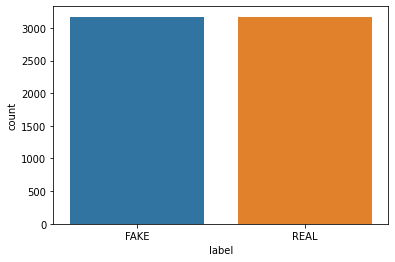

In [22]:
#checking the balance in the dataset
sns.countplot(data['label'])

In [23]:
data.isnull().sum()

Unnamed: 0     0
title          0
text           0
label          0
clean title    0
clean text     0
dtype: int64

In [24]:
tf_idf=hero.tfidf(data['clean text'])

In [25]:
hero.visualization.top_words(data['clean text'])

trump            22414
said             21212
clinton          17500
would            12777
one              11877
                 ...  
pragmatically        1
coronated            1
prog                 1
balza                1
olympiads            1
Name: clean text, Length: 67183, dtype: int64

In [27]:
hero.wordcloud(data['clean text'], max_words=100,)

AttributeError: module 'texthero' has no attribute 'wordcloud'

In [ ]:
from wordcloud import WordCloud

In [ ]:
data.head()

In [ ]:
data['tfidf'] = (
    data['clean text']
    .pipe(hero.clean)
    .pipe(hero.tfidf)
)

In [ ]:
data['kmeans_labels'] = (
    data['tfidf']
    .pipe(hero.kmeans, n_clusters=2)
    .astype(str)
)

data['pca'] = data['tfidf'].pipe(hero.pca)

hero.scatterplot(data, 'pca', color='kmeans_labels', title="K-means BBC Sport news")

In [ ]:
data

In [ ]:
# sns.countplot(hero.top_words(data.cleantext))

In [ ]:
# hero.wordcloud(data['clean text'])

In [28]:
data.shape

(6335, 6)

In [29]:
x=data['text']

In [30]:
# x.drop('kmeans_labels',axis=1,inplace=True)

In [31]:
y=data['label']

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [33]:
x_train

4851    Senate majority leader Mitch McConnell thought...
4101    Washington (CNN) Add Vice President Joe Biden ...
3008    Be part of CNN's COP21 coverage: We'd like to ...
4310    At least a half-dozen attendees shoved and tac...
5984    Washington (CNN) Donald Trump's criticism abou...
                              ...                        
5687    Ted Cruz has developed a reputation as the mos...
3354    What happened in this election? By John Chuckm...
728     In 1982, during one of many visits to Israel, ...
5702    Email \nDespite the fact that voting is the co...
5555    Via Yournewswire \nLet the swamp draining begi...
Name: text, Length: 5068, dtype: object

In [34]:
tf_idf=TfidfVectorizer(stop_words='english',max_df=0.7)
tf_idf_train=tf_idf.fit_transform(x_train)
tf_idf_test=tf_idf.transform(x_test)

In [35]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tf_idf_train,y_train)
y_pred=pac.predict(tf_idf_test)

In [36]:
score=accuracy_score(y_pred,y_test)

In [37]:
print(f'the accuracy score is {score*100}')

the accuracy score is 93.84372533543804


In [38]:
pipeline=Pipeline([('tf_idf',TfidfVectorizer(stop_words='english',max_df=0.7)),('naive bayes',MultinomialNB())])

In [39]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('tf_idf', TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('naive bayes', MultinomialNB())])

In [40]:
score=pipeline.score(x_test,y_test)

In [41]:
print(f'the score is {score*100}')

the score is 85.24072612470403


In [42]:
pred=pipeline.predict(x_test)

In [43]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

        FAKE       0.72      0.98      0.83       464
        REAL       0.98      0.78      0.87       803

    accuracy                           0.85      1267
   macro avg       0.85      0.88      0.85      1267
weighted avg       0.89      0.85      0.86      1267



In [44]:
print(confusion_matrix(pred,y_test))

[[454  10]
 [177 626]]


In [45]:
# from autoviml.Auto_NLP import Auto_NLP

In [46]:
# num = int(0.9*data.shape[0])
# train = data[:num]
# test = data[num:]

# nlp_column='text'
# target = 'label'
# sample_submission=''
# scoring_parameter = 'balanced-accuracy'

In [47]:
# #### If Boosting_Flag = True => XGBoost, Fase=>ExtraTrees, None=>Linear Model
# model, feats, trainm, testm = Auto_NLP(nlp_column,train,target,test, score_type='balance_accuracy',modeltype='Classification',top_num_features=100,verbose=1
#                                    )

In [62]:
from newspaper import Article

In [87]:
url='https://www.livemint.com/news/india/indias-covid-19-positivity-rate-can-be-brought-down-to-less-than-5-in-3-weeks-if-aiims-doctor-11619402076302.html'

In [88]:
article = Article(url)

In [89]:
article.download()

In [90]:
article.parse()

In [91]:
article.text

'New Delhi: India can bring down the positivity rate to less than five per cent in the next three weeks, head of the department of medicine at All India Institute Of Medical Science (AIIMS), Dr Naveet Wig said on Sunday.\n\n"We can bring down the positivity rate to less than five per cent in India, in the next three weeks if we all take responsibility and abide by COVID appropriate behaviour," Dr Wig said while addressing a joint conversation on issues related to the Covid-19 situation with the Director of AIIMS (Delhi ) Dr Randeep Guleria, Director General of Health Services (DGHS), Dr Sunil Kumar, and Chairman of Medanta Dr Naresh Trehan.\n\nHe further highlighted that severe restrictions have to implemented to pull down the positivity rate of COVID-19 cases.\n\n"All district officials must monitor district\'s positivity rate and aim to keep it below 1-5 per cent. Mumbai had 26 per cent positivity rate at one point but after severe restrictions, it came down to 14 per cent. Delhi is 

In [92]:
article.nlp()
news=article.summary

In [93]:
# print(news)

In [94]:
predict=pipeline.predict([news])
# tf_idf=TfidfVectorizer(stop_words='english',max_df=0.7)
# tf_idf_train=tf_idf.fit_transform(article.text)
# # tf_idf_test=tf_idf.transform(article.text)
# pipeline.predict(article.text)

In [95]:
print(f"This news is a {predict[0]} news.")

This news is a FAKE news.
